In [348]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [349]:
import pandas as pd 

In [350]:
ventas=pd.read_excel('Base_control_2.xlsx', sheet_name="detalle")


In [351]:
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación      IVA  \
0                Cliente 934      Ejecutivo 5                  30055   5710.0   
1                Cliente 934      Ejecutivo 5                   8782   1669.0   
2                Cliente 934      Ejecutivo 5                  38556   7326.0   
3                Cliente 934      Ejecutivo 5                  22550   4284.0   
4                Cliente 934      Ejecutivo 5                  84895  16130.0   

   Dias operación  Taa de interés a cliente  Interes  \
0            41.0                      1.15  28802.0   
1            41.0                      1.15   

In [352]:
ventas.shape

(52857, 15)

In [353]:
ventas.drop_duplicates(inplace=True) #eliminamos datos duplicados 

In [354]:
ventas.isnull().sum()

ID_operacion                      0
Fecha creacion operación          2
Monto factura                     3
Nombre empresa solicitante        0
Nombre Ejecutivo                  2
Ingreso por operación             0
IVA                            3128
Dias operación                    2
Taa de interés a cliente          2
Interes                          14
Tasa interes inversionista        2
Unnamed: 11                   52857
Scoring riesgo                    2
Estado pago factura               0
Monto Abono                    4183
dtype: int64

In [355]:
ventas.drop(columns=['Unnamed: 11'], inplace=True) #eliminar columna sin registros

In [356]:
ventas.shape

(52857, 14)

In [357]:
ventas.columns

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'IVA', 'Dias operación',
       'Taa de interés a cliente', 'Interes', 'Tasa interes inversionista',
       'Scoring riesgo', 'Estado pago factura', 'Monto Abono'],
      dtype='object')

In [358]:
from datetime import datetime, timedelta

# 1. Verifica y convierte la columna de fechas si es necesario
ventas['Fecha creacion operación'] = pd.to_datetime(ventas['Fecha creacion operación'], errors='coerce')

# 2. Define el rango específico de fechas (01-01-2023 al 31-12-2024)
fecha_inicio = datetime(2023, 1, 1)
fecha_fin = datetime(2024, 12, 31)

# Filtra los datos dentro del rango de fechas
df_rango_fechas = ventas[(ventas['Fecha creacion operación'] >= fecha_inicio) & 
                         (ventas['Fecha creacion operación'] <= fecha_fin)]

# 3. Define la fecha límite de actividad para determinar inactividad (últimos 180 días desde hoy)
fecha_limite_inactividad = datetime.now() - timedelta(days=180)

# Filtra los ejecutivos activos: Aquellos que tienen transacciones en los últimos 180 días
ejecutivos_activos = df_rango_fechas[
    df_rango_fechas['Fecha creacion operación'] >= fecha_limite_inactividad
]['Nombre Ejecutivo'].unique()

# 4. Filtra nuevamente los datos para incluir solo ejecutivos activos
df_activos = df_rango_fechas[df_rango_fechas['Nombre Ejecutivo'].isin(ejecutivos_activos)]

# 5. Imprime resultados
print(f"Ejecutivos activos entre {fecha_inicio.date()} y {fecha_fin.date()}:")
print(ejecutivos_activos)

print("\nDatos filtrados (solo ejecutivos activos):")
print(df_activos.head())


Ejecutivos activos entre 2023-01-01 y 2024-12-31:
['Ejecutivo 5' 'Ejecutivo 32' 'Ejecutivo 7' 'Ejecutivo 15' 'Ejecutivo 35'
 'Ejecutivo 4' 'Ejecutivo 2' 'Ejecutivo 1' 'Ejecutivo 8' 'Ejecutivo 3'
 'Ejecutivo 18' 'Ejecutivo 13' 'Ejecutivo 22' 'Ejecutivo 6' 'Ejecutivo 28'
 'Ejecutivo 12' 'Ejecutivo 30' 'Ejecutivo 9' 'Ejecutivo 21' 'Ejecutivo 10'
 'Ejecutivo 19' 'Ejecutivo 11' 'Ejecutivo 17' 'Ejecutivo prueba'
 'Ejecutivo 16' 'Ejecutivo 31']

Datos filtrados (solo ejecutivos activos):
   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación      IVA  \
0                Cliente 934      Ejecutivo 5                  30055   5710.0 

In [359]:
# Eliminar las filas donde 'Nombre Ejecutivo' sea 'Ejecutivo prueba'
df_activos = df_activos[df_activos['Nombre Ejecutivo'] != 'Ejecutivo prueba']

print("Filas con 'Ejecutivo prueba' eliminadas:")
print(df_activos.head())



Filas con 'Ejecutivo prueba' eliminadas:
   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación      IVA  \
0                Cliente 934      Ejecutivo 5                  30055   5710.0   
1                Cliente 934      Ejecutivo 5                   8782   1669.0   
2                Cliente 934      Ejecutivo 5                  38556   7326.0   
3                Cliente 934      Ejecutivo 5                  22550   4284.0   
4                Cliente 934      Ejecutivo 5                  84895  16130.0   

   Dias operación  Taa de interés a cliente  Interes  \
0            41.0                      1.15  28802.0   
1    

In [360]:
# Guardar el archivo Excel sin los datos innecesarios
nombre_archivo = "Ventas_filtradas.xlsx"
df_activos.to_excel(nombre_archivo, index=False)

print(f"Archivo guardado exitosamente como '{nombre_archivo}'")


Archivo guardado exitosamente como 'Ventas_filtradas.xlsx'


In [361]:
import pandas as pd
ventas=pd.read_excel('Ventas_filtradas.xlsx', sheet_name="Sheet1")

In [362]:
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación      IVA  \
0                Cliente 934      Ejecutivo 5                  30055   5710.0   
1                Cliente 934      Ejecutivo 5                   8782   1669.0   
2                Cliente 934      Ejecutivo 5                  38556   7326.0   
3                Cliente 934      Ejecutivo 5                  22550   4284.0   
4                Cliente 934      Ejecutivo 5                  84895  16130.0   

   Dias operación  Taa de interés a cliente  Interes  \
0              41                      1.15  28802.0   
1              41                      1.15   

In [363]:
#eliminamos columnas que no utilizaremos para el analisis 
ventas.drop(columns=['IVA', 'Dias operación',
       'Taa de interés a cliente', 'Interes', 'Tasa interes inversionista',
       'Scoring riesgo', 'Estado pago factura', 'Monto Abono'], inplace=True, errors='ignore')

In [364]:
#verificamos columnas existentes
ventas.columns

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación'],
      dtype='object')

In [365]:
# Crear columnas vacías para Propuesta 1
ventas['Clasificación por valor(proyecto1)'] = ""
ventas['% bono respecto al valor de la factura(proyecto1)'] = 0.0
ventas['bono_a_pagar(proyecto1)'] = 0.0


In [366]:
#verificamos que se agreguen las columnas nuevas
ventas.columns

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'Clasificación por valor(proyecto1)',
       '% bono respecto al valor de la factura(proyecto1)',
       'bono_a_pagar(proyecto1)'],
      dtype='object')

In [367]:
 # Clasifica el valor del proyecto basado en el monto de la factura.
def clasificar_valor_proyecto1(monto):
# Devuelve una categoría (Bajo, Medio, Alto) y un porcentaje de bonificación.
    if monto < 50000000:
        return "Bajo valor", 0.0025
    elif 50000000 <= monto <= 200000000:
        return "Medio valor", 0.005
    else:
        return "Alto valor", 0.006
        
#Desempaqueta los resultados (clasificación y porcentaje de bonificación) en dos nuevas columnas.
ventas['Clasificación por valor(proyecto1)'], ventas['% bono respecto al valor de la factura(proyecto1)'] = zip(
    *ventas['Monto factura'].apply(clasificar_valor_proyecto1)
)

In [368]:
#visualizamos columnas nuevas con  valores agregadoe
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  \
0                Cliente 934      Ejecutivo 5                  30055   
1                Cliente 934      Ejecutivo 5                   8782   
2                Cliente 934      Ejecutivo 5                  38556   
3                Cliente 934      Ejecutivo 5                  22550   
4                Cliente 934      Ejecutivo 5                  84895   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4           

In [369]:
#Calcula el bono a pagar multiplicando el monto de la factura por el porcentaje correspondiente
ventas['bono_a_pagar(proyecto1)'] = ventas['Monto factura'] * ventas['% bono respecto al valor de la factura(proyecto1)']

In [370]:
ventas.columns

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'Clasificación por valor(proyecto1)',
       '% bono respecto al valor de la factura(proyecto1)',
       'bono_a_pagar(proyecto1)'],
      dtype='object')

In [371]:
propuesta_1 = ventas[['ID_operacion', 'Fecha creacion operación', 'Nombre Ejecutivo',
                       'Clasificación por valor(proyecto1)', '% bono respecto al valor de la factura(proyecto1)',
                       'bono_a_pagar(proyecto1)']]

In [372]:
#Muestra los primeros registros de los DataFrames ventas
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  \
0                Cliente 934      Ejecutivo 5                  30055   
1                Cliente 934      Ejecutivo 5                   8782   
2                Cliente 934      Ejecutivo 5                  38556   
3                Cliente 934      Ejecutivo 5                  22550   
4                Cliente 934      Ejecutivo 5                  84895   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4           

In [373]:
print(propuesta_1.head())

   ID_operacion Fecha creacion operación Nombre Ejecutivo  \
0         68101               2024-12-31      Ejecutivo 5   
1         68100               2024-12-31      Ejecutivo 5   
2         68099               2024-12-31      Ejecutivo 5   
3         68098               2024-12-31      Ejecutivo 5   
4         68097               2024-12-31      Ejecutivo 5   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4                         Bajo valor   

   % bono respecto al valor de la factura(proyecto1)  bono_a_pagar(proyecto1)  
0                                             0.0025                  4581.50  
1                                             0.0025                  1338.75  
2                                             0.0025                  6693.75  
3                                             0.0025                  38

In [374]:
# Crear columnas vacías para Propuesta 2
ventas['Clasificación por valor(proyecto2)'] = ""
ventas['% bono respecto al ingreso de la factura(proyecto2)'] = 0.0
ventas['bono_a_pagar(proyecto2)'] = 0.0

In [375]:
# Clasifica el valor del proyecto basado en el ingreso por operación.
def clasificar_valor_proyecto2(ingreso):
# Devuelve una categoría (Bajo, Medio, Alto) y un porcentaje de bonificación. 
    if ingreso < 100000:
        return "Bajo valor", 0.05
    elif 100000 <= ingreso <= 1000000:
        return "Medio valor", 0.0875
    else:
        return "Alto valor", 0.1
#Desempaqueta los resultados (clasificación y porcentaje de bonificación) en dos nuevas columnas.
ventas['Clasificación por valor(proyecto2)'], ventas['% bono respecto al ingreso de la factura(proyecto2)'] = zip(
    *ventas['Ingreso por operación'].apply(clasificar_valor_proyecto2)
)

In [376]:
#Calcula el bono a pagar multiplicando el ingreso por operación por el porcentaje correspondiente.
ventas['bono_a_pagar(proyecto2)'] = ventas['Ingreso por operación'] * ventas['% bono respecto al ingreso de la factura(proyecto2)']

In [377]:
#Filtra las columnas relevantes para el proyecto 2 y las almacena en el DataFrame
propuesta_2 = ventas[['ID_operacion', 'Fecha creacion operación', 'Nombre Ejecutivo',
                       'Clasificación por valor(proyecto2)', '% bono respecto al ingreso de la factura(proyecto2)',
                       'bono_a_pagar(proyecto2)']]

In [378]:
#Muestra los primeros registros del DataFrame propuesta_2
print(propuesta_2.head())

   ID_operacion Fecha creacion operación Nombre Ejecutivo  \
0         68101               2024-12-31      Ejecutivo 5   
1         68100               2024-12-31      Ejecutivo 5   
2         68099               2024-12-31      Ejecutivo 5   
3         68098               2024-12-31      Ejecutivo 5   
4         68097               2024-12-31      Ejecutivo 5   

  Clasificación por valor(proyecto2)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4                         Bajo valor   

   % bono respecto al ingreso de la factura(proyecto2)  \
0                                               0.05     
1                                               0.05     
2                                               0.05     
3                                               0.05     
4                                               0.05     

   bono_a_pagar(proyecto2)  
0             

In [379]:
 # Clasifica el tráfico en Bajo, Medio o Alto basado en la cantidad de clientes.
def clasificar_trafico(cantidad):
 # Devuelve la clasificación y el bono fijo asociado.   
    if cantidad < 8:
        return "Bajo tráfico", 50000
    elif 8 <= cantidad <= 12:
        return "Medio tráfico", 120000
    else:
        return "Alto tráfico", 250000

In [380]:
# Crear el DataFrame clientes_operando (asegurándote de que esté definido)
clientes_operando = ventas.groupby('Nombre Ejecutivo')['Nombre empresa solicitante'].nunique().reset_index()
clientes_operando.columns = ['Nombre Ejecutivo', 'Cantidad de clientes operando']

# Aplicar la función de clasificación al DataFrame 'clientes_operando'
clientes_operando['Clasificación'] = clientes_operando['Cantidad de clientes operando'].apply(lambda x: clasificar_trafico(x)[0])
clientes_operando['Bono fijo bruto'] = clientes_operando['Cantidad de clientes operando'].apply(lambda x: clasificar_trafico(x)[1])

# Verificar el DataFrame resultante
print(clientes_operando)

   Nombre Ejecutivo  Cantidad de clientes operando  Clasificación  \
0       Ejecutivo 1                             51   Alto tráfico   
1      Ejecutivo 10                             20   Alto tráfico   
2      Ejecutivo 11                             15   Alto tráfico   
3      Ejecutivo 12                             19   Alto tráfico   
4      Ejecutivo 13                             53   Alto tráfico   
5      Ejecutivo 15                             20   Alto tráfico   
6      Ejecutivo 16                             10  Medio tráfico   
7      Ejecutivo 17                             13   Alto tráfico   
8      Ejecutivo 18                             26   Alto tráfico   
9      Ejecutivo 19                             12  Medio tráfico   
10      Ejecutivo 2                             81   Alto tráfico   
11     Ejecutivo 21                             12  Medio tráfico   
12     Ejecutivo 22                             26   Alto tráfico   
13     Ejecutivo 28               

In [381]:
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  \
0                Cliente 934      Ejecutivo 5                  30055   
1                Cliente 934      Ejecutivo 5                   8782   
2                Cliente 934      Ejecutivo 5                  38556   
3                Cliente 934      Ejecutivo 5                  22550   
4                Cliente 934      Ejecutivo 5                  84895   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4           

In [382]:
# Crear una columna 'Mes/Año' en el DataFrame para agrupar por mes
ventas['Mes/Año'] = ventas['Fecha creacion operación'].dt.to_period('M')

# Visualizar los primeros registros de la nueva columna 'Mes/Año'
print("Primeros registros después de agregar la columna 'Mes/Año':")
print(ventas[['Fecha creacion operación', 'Mes/Año']].head())


Primeros registros después de agregar la columna 'Mes/Año':
  Fecha creacion operación  Mes/Año
0               2024-12-31  2024-12
1               2024-12-31  2024-12
2               2024-12-31  2024-12
3               2024-12-31  2024-12
4               2024-12-31  2024-12


In [383]:
# Verificar si la columna 'Cantidad de clientes operando' está en el DataFrame ventas
if 'Cantidad de clientes operando' not in ventas.columns:
    print("'Cantidad de clientes operando' no está en el DataFrame 'ventas'. Realizando el merge...")

    # Realizar el merge con el DataFrame 'clientes_operando'
    ventas = ventas.merge(
        clientes_operando[['Nombre Ejecutivo', 'Cantidad de clientes operando']],
        on='Nombre Ejecutivo',
        how='left',
        suffixes=('', '_duplicado')  # Sufijo para identificar duplicados
    )


'Cantidad de clientes operando' no está en el DataFrame 'ventas'. Realizando el merge...


In [384]:
# Eliminar columnas duplicadas (si existen)
if 'Cantidad de clientes operando_duplicado' in ventas.columns:
    print("Se detectó la columna 'Cantidad de clientes operando_duplicado'. Combinando valores...")

    # Combinar valores de las columnas originales y duplicadas
    ventas['Cantidad de clientes operando'] = ventas['Cantidad de clientes operando'].fillna(
        ventas['Cantidad de clientes operando_duplicado']
    )

    # Eliminar la columna duplicada
    ventas.drop(columns=['Cantidad de clientes operando_duplicado'], inplace=True)

In [385]:
# Eliminar columnas innecesarias con sufijos _x e _y si aparecen
if 'Cantidad de clientes operando_x' in ventas.columns and 'Cantidad de clientes operando_y' in ventas.columns:
    print("Se detectaron columnas con sufijos '_x' y '_y'. Combinando valores...")

    # Combinar valores de las columnas
    ventas['Cantidad de clientes operando'] = ventas['Cantidad de clientes operando_x'].combine_first(
        ventas['Cantidad de clientes operando_y']
    )

    # Eliminar columnas con sufijos
    ventas.drop(columns=['Cantidad de clientes operando_x', 'Cantidad de clientes operando_y'], inplace=True)

In [386]:
# Confirmar que solo queda una columna final y que está limpia
if 'Cantidad de clientes operando' not in ventas.columns:
    raise KeyError("La columna 'Cantidad de clientes operando' no se encuentra en el DataFrame ventas.")

# Imprimir columnas actuales para confirmar limpieza
print("Columnas actuales en ventas después de limpieza:", ventas.columns)

# Visualizar los primeros registros del DataFrame actualizado
print("Primeros registros del DataFrame actualizado:")
print(ventas.head())

Columnas actuales en ventas después de limpieza: Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'Clasificación por valor(proyecto1)',
       '% bono respecto al valor de la factura(proyecto1)',
       'bono_a_pagar(proyecto1)', 'Clasificación por valor(proyecto2)',
       '% bono respecto al ingreso de la factura(proyecto2)',
       'bono_a_pagar(proyecto2)', 'Mes/Año', 'Cantidad de clientes operando'],
      dtype='object')
Primeros registros del DataFrame actualizado:
   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por o

In [387]:
# Agrupar los datos por ejecutivo y mes/año, sumando montos relevantes
ventas_mensuales = ventas.groupby(['Nombre Ejecutivo', 'Mes/Año']).agg(
    Total_factura=('Monto factura', 'sum'),
    Total_ingreso=('Ingreso por operación', 'sum'),
    Clientes_operando=('Cantidad de clientes operando', 'max')  # Utilizar el máximo por mes
).reset_index()

# Visualizar una muestra del DataFrame agrupado
print("Primeros registros de 'ventas_mensuales':")
print(ventas_mensuales.head())


Primeros registros de 'ventas_mensuales':
  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51


In [388]:
# Agrupar los datos por ejecutivo y mes/año, sumando montos relevantes
ventas_mensuales = ventas.groupby(['Nombre Ejecutivo', 'Mes/Año']).agg(
    Total_factura=('Monto factura', 'sum'),
    Total_ingreso=('Ingreso por operación', 'sum'),
    Clientes_operando=('Cantidad de clientes operando', 'max')  # Utilizar el máximo por mes
).reset_index()

# Visualizar una muestra del DataFrame agrupado
print("Primeros registros de 'ventas_mensuales':")
print(ventas_mensuales.head())

Primeros registros de 'ventas_mensuales':
  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51


In [389]:
# Agrupar los datos por ejecutivo y mes/año, sumando montos relevantes
ventas_mensuales = ventas.groupby(['Nombre Ejecutivo', 'Mes/Año']).agg(
    Total_factura=('Monto factura', 'sum'),
    Total_ingreso=('Ingreso por operación', 'sum'),
    Clientes_operando=('Cantidad de clientes operando', 'max')  # Utilizar el máximo por mes
).reset_index()

# Visualizar una muestra del DataFrame agrupado
print("Primeros registros de 'ventas_mensuales':")
print(ventas_mensuales.head())

Primeros registros de 'ventas_mensuales':
  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51


In [390]:
# Calcular bonos según Propuesta 1
ventas_mensuales['% Bono P1'] = ventas_mensuales['Total_factura'].apply(lambda monto: 
    0.0025 if monto < 50000000 else (0.005 if monto <= 200000000 else 0.006))
ventas_mensuales['Bono P1'] = ventas_mensuales['Total_factura'] * ventas_mensuales['% Bono P1']

# Calcular bonos según Propuesta 2
ventas_mensuales['% Bono P2'] = ventas_mensuales['Total_ingreso'].apply(lambda ingreso: 
    0.05 if ingreso < 100000 else (0.0875 if ingreso <= 1000000 else 0.1))
ventas_mensuales['Bono P2'] = ventas_mensuales['Total_ingreso'] * ventas_mensuales['% Bono P2']

# Aplicar la función para calcular el bono fijo basado en los clientes operando
ventas_mensuales['Bono Fijo'] = ventas_mensuales['Clientes_operando'].apply(lambda x: 
    50000 if x < 8 else (120000 if x <= 12 else 250000))

# Visualizar una muestra después de calcular bonos
print("Primeros registros de 'ventas_mensuales' después del cálculo de bonos:")
print(ventas_mensuales[['Nombre Ejecutivo', 'Mes/Año', '% Bono P1', 'Bono P1', '% Bono P2', 'Bono P2', 'Bono Fijo']].head())

Primeros registros de 'ventas_mensuales' después del cálculo de bonos:
  Nombre Ejecutivo  Mes/Año  % Bono P1      Bono P1  % Bono P2    Bono P2  \
0      Ejecutivo 1  2023-01      0.006  3919733.694        0.1   947890.6   
1      Ejecutivo 1  2023-02      0.006  3776440.374        0.1   929694.4   
2      Ejecutivo 1  2023-03      0.006  4529150.022        0.1   891531.1   
3      Ejecutivo 1  2023-04      0.006  5643242.520        0.1  1224431.3   
4      Ejecutivo 1  2023-05      0.006  5244716.736        0.1  1309936.1   

   Bono Fijo  
0     250000  
1     250000  
2     250000  
3     250000  
4     250000  


In [391]:
# Calcular el bono total para cada propuesta
ventas_mensuales['Bono Total P1'] = ventas_mensuales['Bono P1'] + ventas_mensuales['Bono Fijo']
ventas_mensuales['Bono Total P2'] = ventas_mensuales['Bono P2'] + ventas_mensuales['Bono Fijo']

# Crear columna 'Año' para facilitar agrupaciones por año
ventas_mensuales['Año'] = ventas_mensuales['Mes/Año'].dt.year

# Agrupar por ejecutivo y año para sumar los bonos anuales por cada propuesta
bonos_anuales_por_año = ventas_mensuales.groupby(['Nombre Ejecutivo', 'Año']).agg(
    Total_P1=('Bono Total P1', 'sum'),
    Total_P2=('Bono Total P2', 'sum')
).reset_index()

# Visualizar una muestra del DataFrame anual
print("Bonos anuales por ejecutivo y año:")
print(bonos_anuales_por_año.head())


Bonos anuales por ejecutivo y año:
  Nombre Ejecutivo   Año      Total_P1      Total_P2
0      Ejecutivo 1  2023  6.581906e+07  1.841286e+07
1      Ejecutivo 1  2024  8.094600e+07  1.846586e+07
2     Ejecutivo 10  2023  8.365202e+06  5.155840e+06
3     Ejecutivo 10  2024  1.466077e+07  6.924218e+06
4     Ejecutivo 11  2023  3.267302e+06  1.402288e+06


In [392]:
# Pivotear los datos para tener los años como columnas
bonos_anuales_pivot = bonos_anuales_por_año.pivot(
    index='Nombre Ejecutivo', columns='Año', values=['Total_P1', 'Total_P2']
).reset_index()

# Ajustar los nombres de las columnas para mayor claridad
bonos_anuales_pivot.columns = [
    'Nombre Ejecutivo', 'Total_P1_2023', 'Total_P1_2024', 'Total_P2_2023', 'Total_P2_2024'
]

# Reemplazar NaN con 0 en caso de que algún ejecutivo no tenga datos para un año específico
bonos_anuales_pivot.fillna(0, inplace=True)

# Visualizar la estructura final pivotada
print("Bonos anuales pivotados:")
print(bonos_anuales_pivot.head())

Bonos anuales pivotados:
  Nombre Ejecutivo  Total_P1_2023  Total_P1_2024  Total_P2_2023  Total_P2_2024
0      Ejecutivo 1   6.581906e+07   8.094600e+07   1.841286e+07   1.846586e+07
1     Ejecutivo 10   8.365202e+06   1.466077e+07   5.155840e+06   6.924218e+06
2     Ejecutivo 11   3.267302e+06   7.462522e+06   1.402288e+06   6.536561e+06
3     Ejecutivo 12   8.035938e+05   1.793946e+07   7.682686e+05   7.500269e+06
4     Ejecutivo 13   7.289015e+06   2.154059e+07   4.635906e+06   1.020514e+07


In [393]:
# Filtrar datos entre enero 2023 y diciembre 2024 para bonos mensuales totales
filtered_bonos = ventas_mensuales[
    (ventas_mensuales['Mes/Año'] >= '2023-01') &
    (ventas_mensuales['Mes/Año'] <= '2024-12')
]

# Agrupar por 'Mes/Año' y calcular las sumas totales
bonos_Totales_Mensuales = filtered_bonos.groupby('Mes/Año', as_index=False).agg({
    'Bono Total P1': 'sum',
    'Bono Total P2': 'sum'
})


In [394]:
print(filtered_bonos.head())

  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando  \
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51   
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51   
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51   
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51   
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51   

   % Bono P1      Bono P1  % Bono P2    Bono P2  Bono Fijo  Bono Total P1  \
0      0.006  3919733.694        0.1   947890.6     250000    4169733.694   
1      0.006  3776440.374        0.1   929694.4     250000    4026440.374   
2      0.006  4529150.022        0.1   891531.1     250000    4779150.022   
3      0.006  5643242.520        0.1  1224431.3     250000    5893242.520   
4      0.006  5244716.736        0.1  1309936.1     250000    5494716.736   

   Bono Total P2   Año  
0      1197890.6  2023  
1     

In [395]:
# Asegurarnos de que las columnas son las correctas
# Ajusta los nombres si es necesario
suma_totales = bonos_Totales_Mensuales[['Bono Total P1', 'Bono Total P2']].sum()

# Crear un nuevo DataFrame con las sumas
df_suma_final = pd.DataFrame({
    'Periodo': ['Total_P1', 'Total_P2'],
    'Suma Anual': [suma_totales['Bono Total P1'], suma_totales['Bono Total P2']]
})

# Mostrar el nuevo DataFrame
print("\nDataFrame con las sumas anuales:")
print(df_suma_final)


DataFrame con las sumas anuales:
    Periodo    Suma Anual
0  Total_P1  1.097752e+09
1  Total_P2  3.528330e+08


In [396]:
import pandas as pd
from openpyxl import load_workbook

# Cargar la hoja específica "Sheet1" del archivo Excel existente
archivo_existente = "Ventas_filtradas.xlsx"
ventas_filtradas_df = pd.read_excel(archivo_existente, sheet_name="Sheet1")  # Cargar la hoja Sheet1

# Crear un nuevo archivo con esta hoja y otras nuevas
nuevo_archivo = "Nuevo_Reporte.xlsx"

# Usar pd.ExcelWriter para escribir las hojas en el nuevo archivo
with pd.ExcelWriter(nuevo_archivo, engine='openpyxl') as writer:
    # Agregar la hoja "Sheet1" con un nuevo nombre (por ejemplo, "Base Original")
    ventas_filtradas_df.to_excel(writer, sheet_name='Base Original', index=False)  # Cambia 'Base Original' por el nombre que desees
    
    # Agregar nuevas hojas al archivo sin índices
    propuesta_1.to_excel(writer, sheet_name='Propuesta 1', index=False)
    propuesta_2.to_excel(writer, sheet_name='Propuesta 2', index=False)
    clientes_operando.to_excel(writer, sheet_name='Clientes Operando', index=False)
    ventas_mensuales.to_excel(writer, sheet_name='Bonos Mensuales Detallados', index=False)  # Cambié index=True a index=False
    bonos_anuales_por_año.to_excel(writer, sheet_name='Lista de Bonos Anuales', index=False)  # Cambié index=True a index=False
    bonos_anuales_pivot.to_excel(writer, sheet_name='Bonos Anuales por Ejecutivo', index=False)  # Cambié index=True a index=False
    bonos_Totales_Mensuales.to_excel(writer, sheet_name='Bonos Totales Mensuales', index=False)  # Cambié index=True a index=False
    df_suma_final.to_excel(writer, sheet_name='Bonos Totales Anuales', index=False)

print(f"El nuevo archivo '{nuevo_archivo}' fue creado con éxito.")


El nuevo archivo 'Nuevo_Reporte.xlsx' fue creado con éxito.


In [397]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la hoja "Bonos Totales Mensuales"
file_path = "Final.xlsx"  # Cambia este nombre si es necesario
bonos_totales_mensuales = pd.read_excel(file_path, sheet_name='Bonos Totales Mensuales')

# Convertir los valores a millones
bonos_totales_mensuales[['Bono Total P1', 'Bono Total P2']] /= 1_000_000

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bonos_totales_mensuales.melt(id_vars='Mes/Año', value_vars=['Bono Total P1', 'Bono Total P2']),
    x='Mes/Año',
    y='value',
    hue='variable',
    palette=['#1f77b4', '#ff7f0e']  # Azul y Naranja
)
plt.title("Bonos Totales Mensuales (en millones)", fontsize=16)
plt.xlabel("Mes/Año", fontsize=12)
plt.ylabel("Bonos Totales (Millones)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Tipo de Bono", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Final.xlsx'

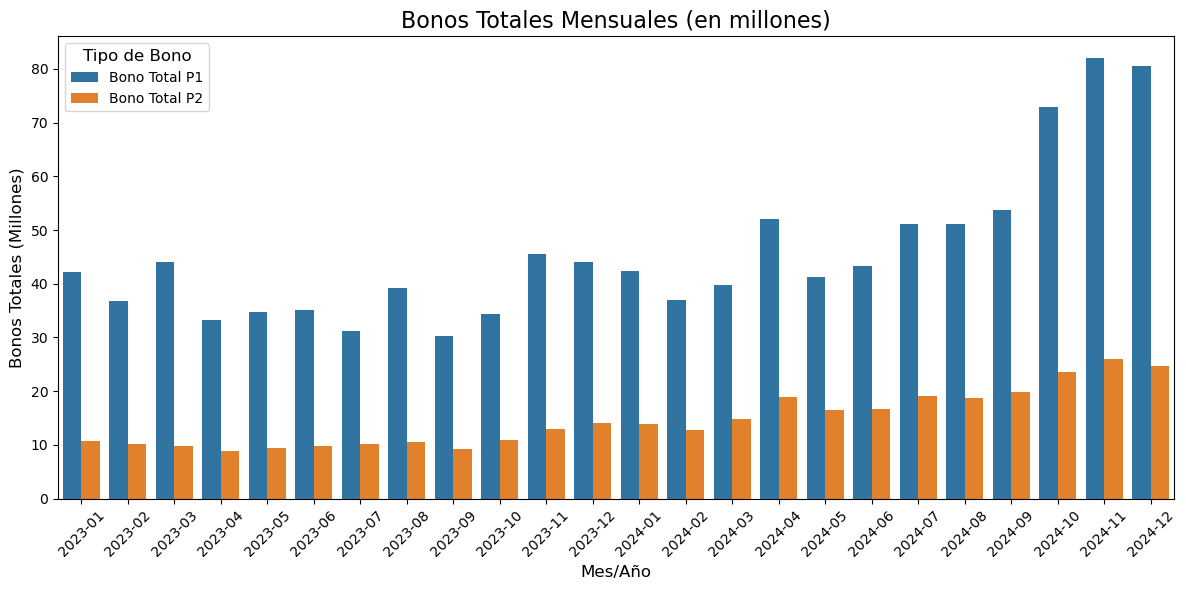

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la hoja "Bonos Totales Mensuales"
file_path = "Nuevo_Reporte.xlsx"  
try:
    bonos_totales_mensuales = pd.read_excel(file_path, sheet_name='Bonos Totales Mensuales')
    
    # Convertir los valores a millones
    bonos_totales_mensuales[['Bono Total P1', 'Bono Total P2']] /= 1_000_000

    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=bonos_totales_mensuales.melt(id_vars='Mes/Año', value_vars=['Bono Total P1', 'Bono Total P2']),
        x='Mes/Año',
        y='value',
        hue='variable',
        palette=['#1f77b4', '#ff7f0e']  # Azul y Naranja
    )
    plt.title("Bonos Totales Mensuales (en millones)", fontsize=16)
    plt.xlabel("Mes/Año", fontsize=12)
    plt.ylabel("Bonos Totales (Millones)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title="Tipo de Bono", fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()



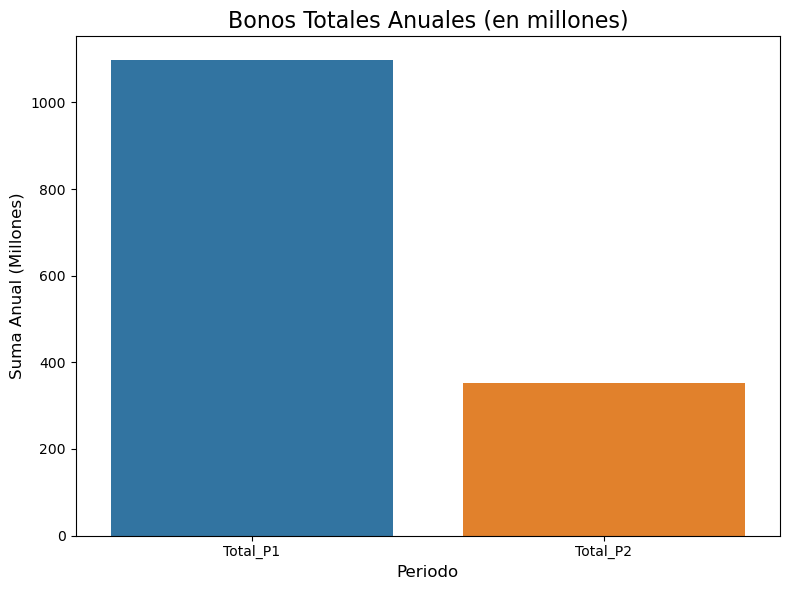

In [456]:
# Simulación de la tabla en un DataFrame
# Cambia 'Final.xlsx' y 'Bonos Totales Anuales' según sea necesario
try:
    bonos_totales_anuales = pd.read_excel(file_path, sheet_name='Bonos Totales Anuales')

    # Convertir los valores a millones
    bonos_totales_anuales['Suma Anual'] /= 1_000_000

    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=bonos_totales_anuales,
        x='Periodo',
        y='Suma Anual',
        palette=['#1f77b4', '#ff7f0e']  # Azul y Naranja
    )
    plt.title("Bonos Totales Anuales (en millones)", fontsize=16)
    plt.xlabel("Periodo", fontsize=12)  # Cambié a 'Periodo'
    plt.ylabel("Suma Anual (Millones)", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

